In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df.shape

(31647, 18)

In [7]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

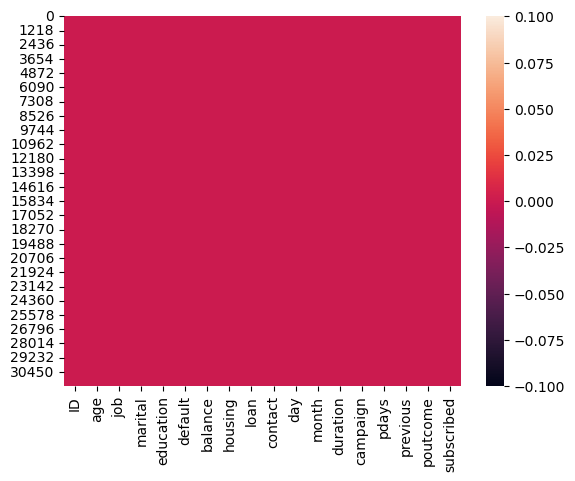

In [10]:
#Let's make a heatmap to analys null values of dataset after treting them.
sns.heatmap(df.isnull())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [12]:
df.nunique().to_frame("Unique values")

,Unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
df.drop(columns='ID', inplace= True)

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [5]:
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['subscribed'] = label_encoder.fit_transform(df['subscribed'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,no,0,1,19,nov,44,2,-1,0,3,0
1,31,11,1,1,0,3,no,0,0,20,jul,91,2,-1,0,3,0
2,27,7,1,1,0,891,yes,0,0,18,jul,240,1,-1,0,3,0
3,57,4,0,2,0,3287,no,0,0,22,jun,867,1,84,3,2,1
4,31,9,1,1,0,119,yes,0,0,4,feb,380,1,-1,0,3,0


Let's remove month and day column as we already have duration in total.

In [7]:
df.drop(columns=['month','day'], inplace=True)

In [8]:
df.drop(columns=['housing'], inplace=True)

In [29]:
df.corr()

,age,job,marital,education,default,balance,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.012657,0.026733,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.039049,-0.078253,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.041654,-0.040180,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.045950,-0.112000,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,0.081567,0.014053,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.083631,-0.024083,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,1.000000,-0.009213,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,-0.009213,1.000000,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
duration,-0.003870,0.002694,0.011544,0.003842,-0.010849,0.024274,-0.012781,-0.016503,1.000000,-0.080305,0.000529,0.001783,0.009771,0.389838
campaign,0.005733,0.001469,-0.009394,0.006142,0.018538,-0.012032,0.009340,0.022666,-0.080305,1.000000,-0.087570,-0.033151,0.100720,-0.070607


In [30]:
df.describe()

,age,job,marital,education,default,balance,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.162132,0.644642,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.368578,0.899480,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,0.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,0.000000,2.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,2.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


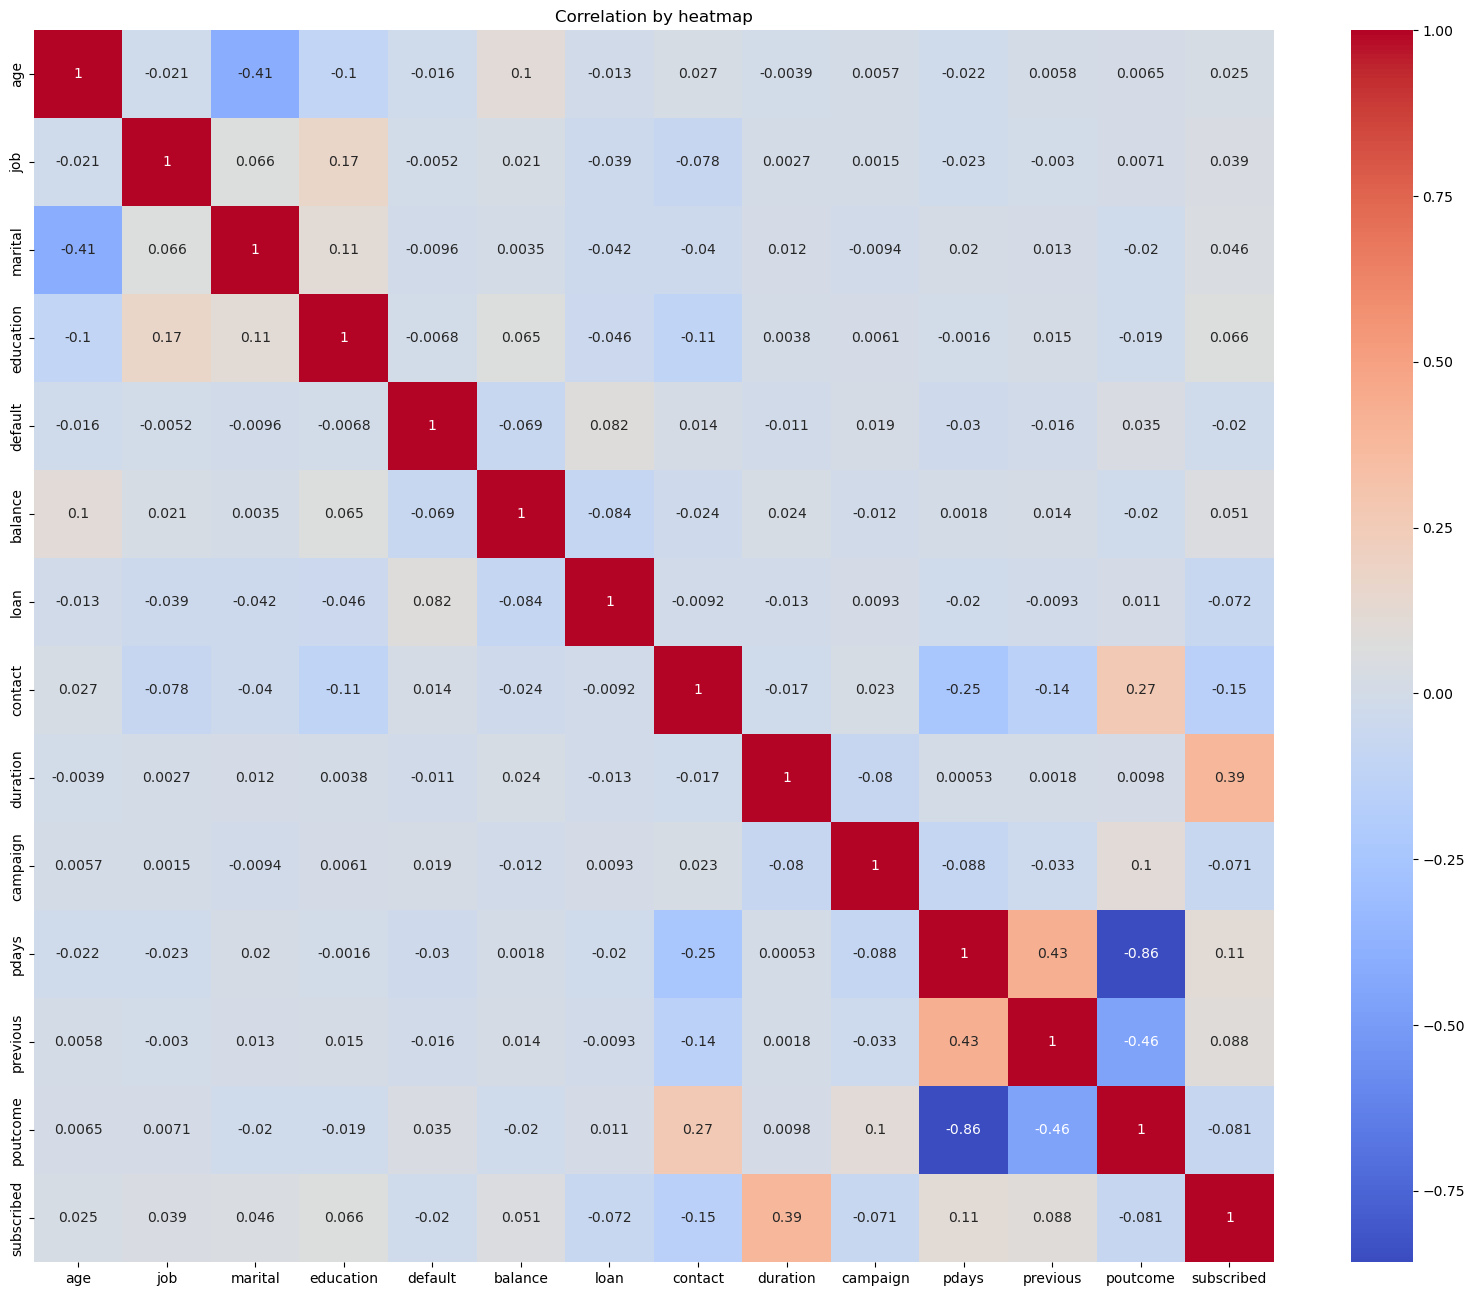

In [32]:
# let's also check corrrelation with the help of heatmap   
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

In [9]:
df.drop(columns=['pdays'], inplace=True)

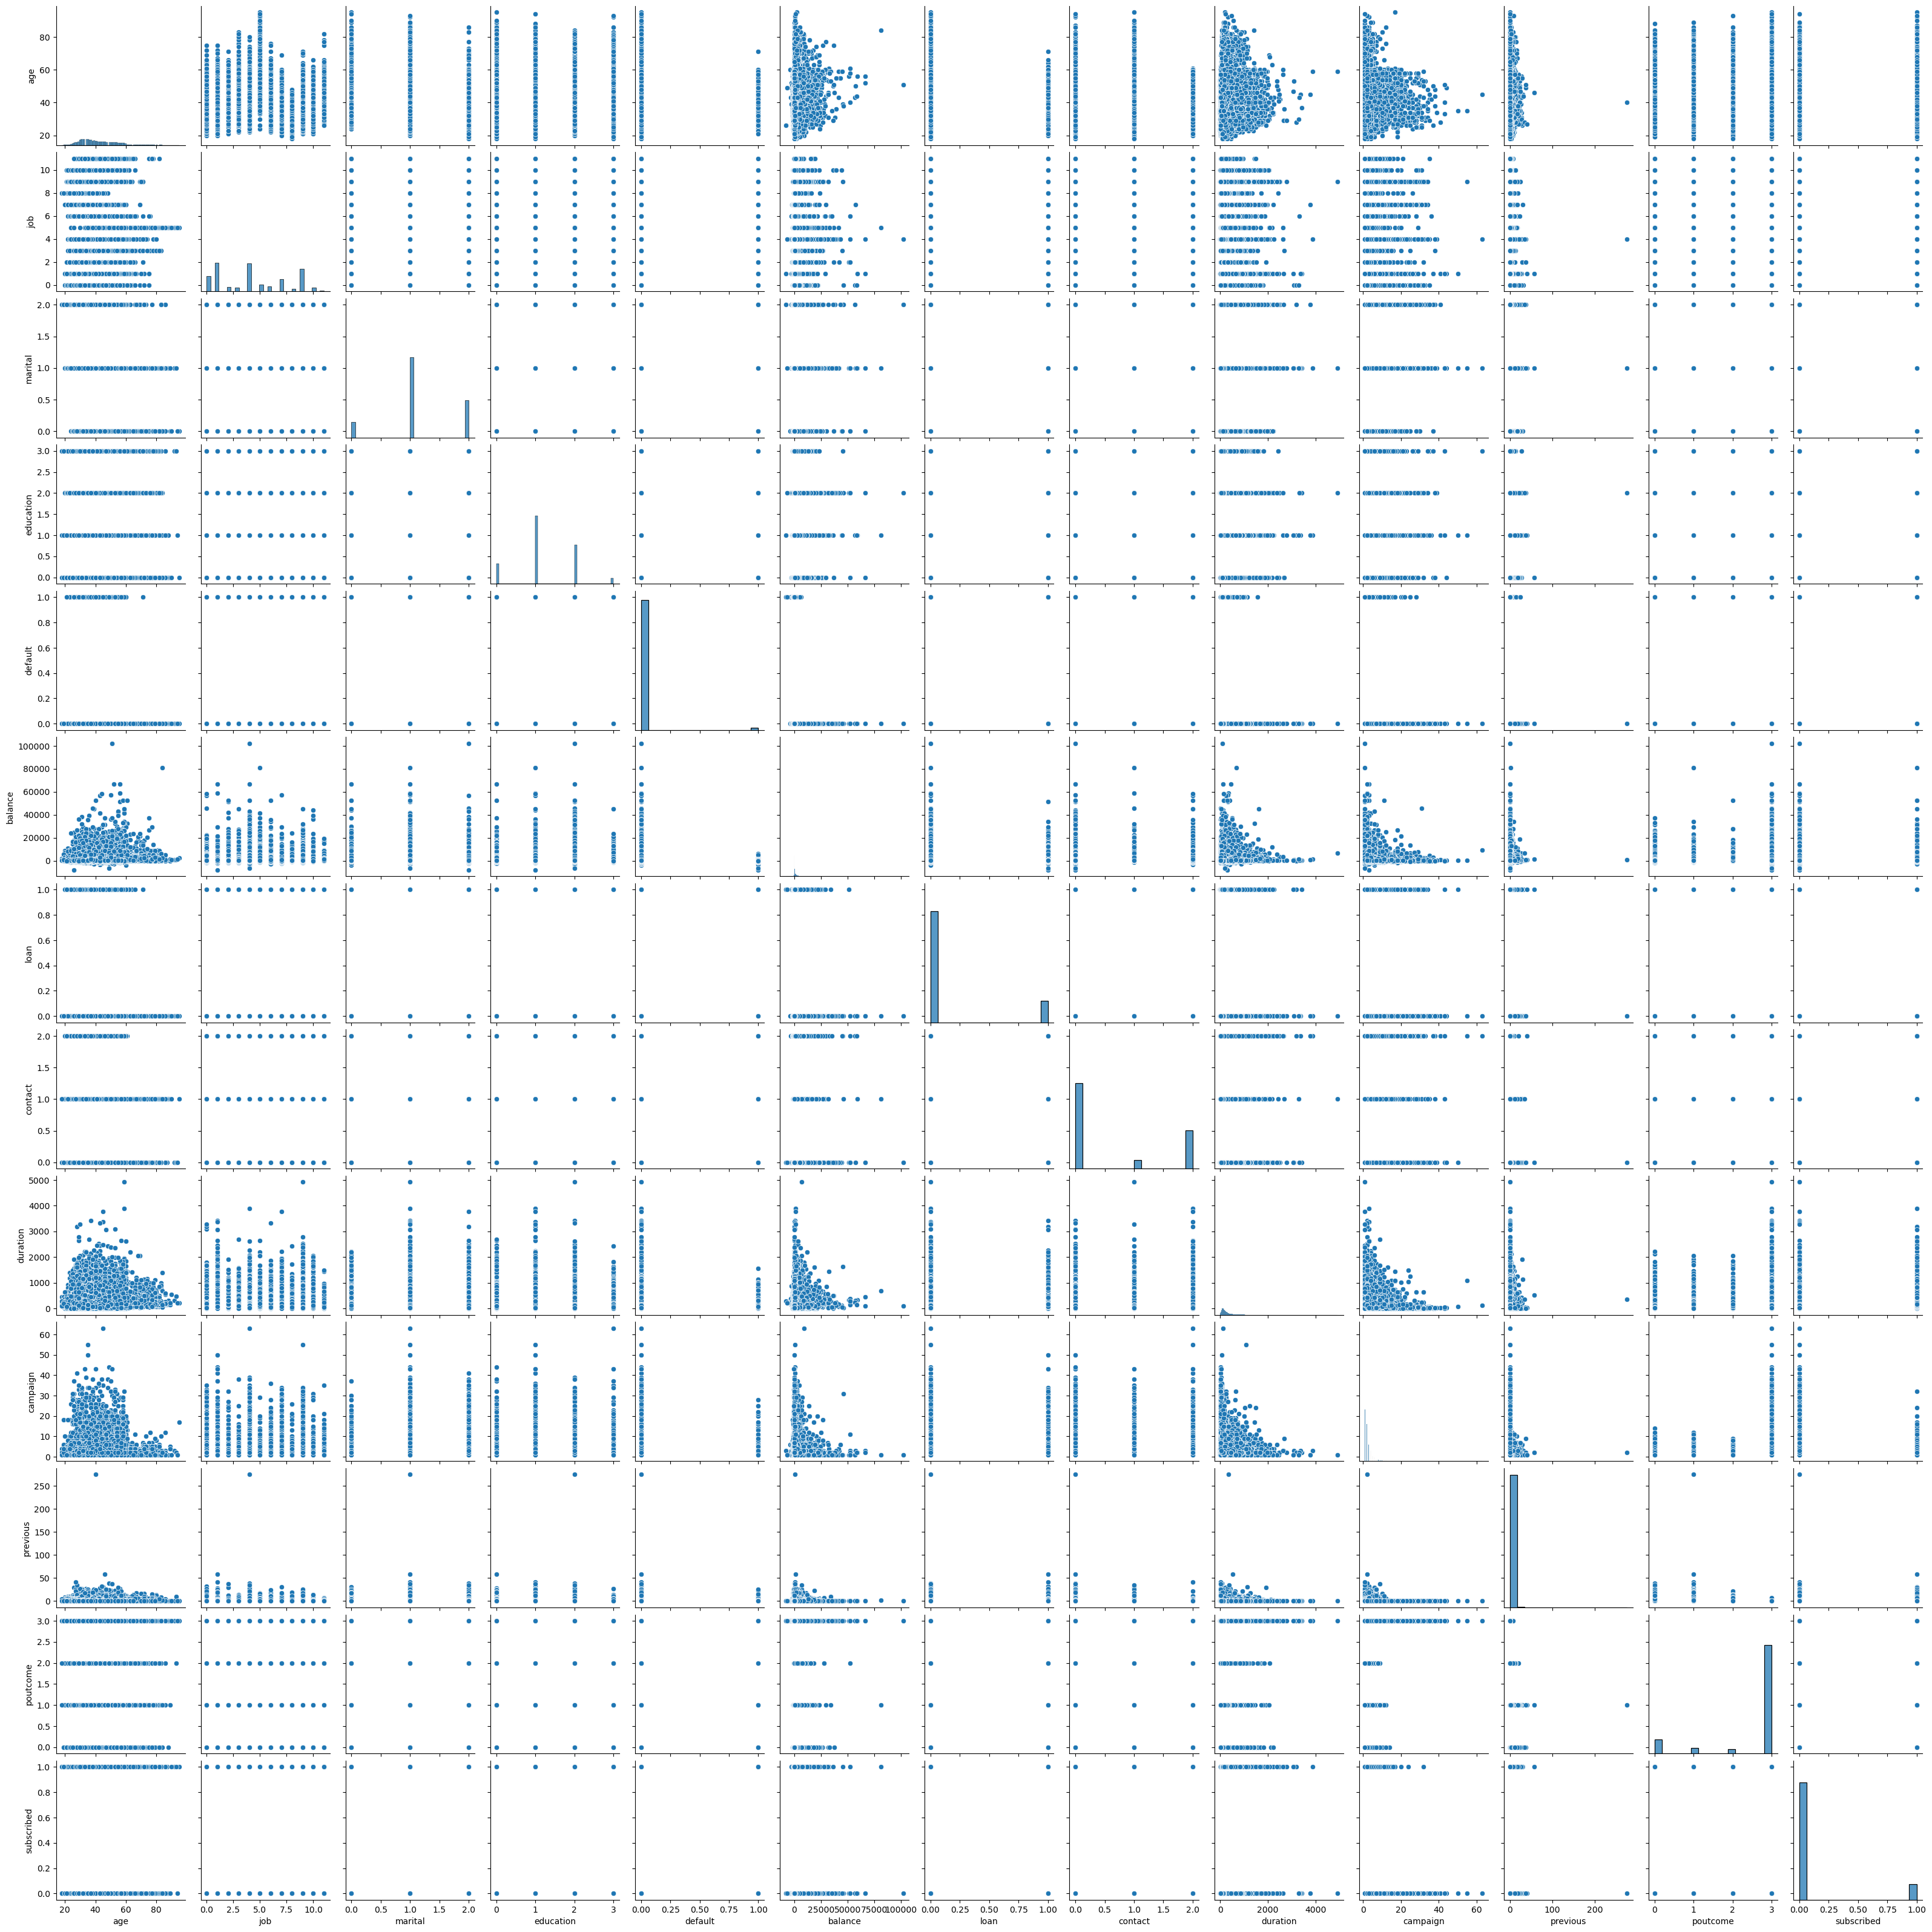

In [36]:
sns.pairplot(data=df,palette="dark1")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'job'),
  Text(3, 0, 'marital'),
  Text(4, 0, 'education'),
  Text(5, 0, 'default'),
  Text(6, 0, 'balance'),
  Text(7, 0, 'loan'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'duration'),
  Text(10, 0, 'campaign'),
  Text(11, 0, 'previous'),
  Text(12, 0, 'poutcome'),
  Text(13, 0, 'subscribed')])

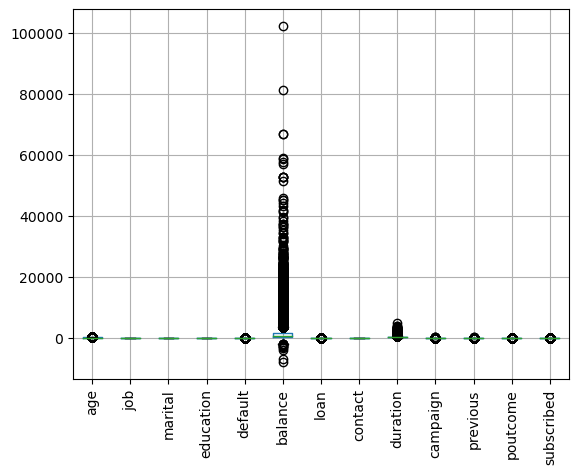

In [37]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

In [10]:
#Let's find outlier with Zscore method
outliers=df[['age','job','balance','duration','campaign','previous']]
z=np.abs(zscore(outliers))
z

,age,job,balance,duration,campaign,previous
0,1.415793,1.324317,0.187933,0.832754,0.245906,0.237059
1,0.937156,2.037729,0.449397,0.649957,0.245906,0.237059
2,1.313627,0.815167,0.156159,0.070449,0.567059,0.237059
3,1.509911,0.101755,0.635055,2.368149,0.567059,1.001336
4,0.937156,1.426448,0.411091,0.474054,0.567059,0.237059
...,...,...,...,...,...,...
31642,1.125392,0.101755,0.450388,0.552724,0.245906,0.237059
31643,1.133439,0.101755,0.324903,0.699635,0.245906,0.237059
31644,0.843038,0.101755,0.347358,0.859979,0.075247,0.237059
31645,1.509911,1.426448,0.376088,0.918319,1.359859,4.716521


In [11]:
np.where(z>3)

(array([   21,    26,   134, ..., 31622, 31645, 31646], dtype=int64),
 array([4, 2, 4, ..., 0, 5, 3], dtype=int64))

In [12]:
df1=df[(z<3).all(axis=1)]

In [13]:
df1.shape

(29243, 13)

In [14]:
df1.skew()

age           0.446161
job           0.268765
marital      -0.103045
education     0.209934
default       7.071126
balance       2.453871
loan          1.802837
contact       0.744792
duration      1.592122
campaign      2.073007
previous      3.281115
poutcome     -2.062109
subscribed    2.598413
dtype: float64

In [15]:
df1['default']=np.square(df1['default'])
df1['balance']=np.square(df1['balance'])
df1['loan']=np.square(df1['loan'])
df1['duration']=np.square(df1['duration'])
df1['campaign']=np.square(df1['campaign'])
df1['previous']=np.square(df1['previous'])
df1['subscribed']=np.square(df1['subscribed'])

In [16]:
df1.skew()

age           0.446161
job           0.268765
marital      -0.103045
education     0.209934
default       7.071126
balance       4.868068
loan          1.802837
contact       0.744792
duration      3.139190
campaign      4.037761
previous      5.641360
poutcome     -2.062109
subscribed    2.598413
dtype: float64

In [17]:
df1['default']=np.cbrt(df1['default'])
df1['balance']=np.cbrt(df1['balance'])
df1['loan']=np.cbrt(df1['loan'])
df1['duration']=np.cbrt(df1['duration'])
df1['campaign']=np.cbrt(df1['campaign'])
df1['previous']=np.cbrt(df1['previous'])
df1['subscribed']=np.cbrt(df1['subscribed'])

In [18]:
df1.skew()

age           0.446161
job           0.268765
marital      -0.103045
education     0.209934
default       7.071126
balance       1.646314
loan          1.802837
contact       0.744792
duration      0.996851
campaign      1.498243
previous      2.513794
poutcome     -2.062109
subscribed    2.598413
dtype: float64

In [19]:
from scipy.stats import yeojohnson
from scipy.stats import boxcox

In [20]:
column_name = 'poutcome'
df1['poutcome'], _ = yeojohnson(df1['poutcome'])

In [21]:
df1.skew()

age           0.446161
job           0.268765
marital      -0.103045
education     0.209934
default       7.071126
balance       1.646314
loan          1.802837
contact       0.744792
duration      0.996851
campaign      1.498243
previous      2.513794
poutcome     -1.768896
subscribed    2.598413
dtype: float64

In [22]:
df1.drop(columns=['default'], inplace=True)

In [23]:
features = ['age', 'job', 'marital', 'education', 'balance', 'loan', 'contact','duration','campaign', 'previous','poutcome']
target = 'subscribed'

In [24]:
x = df1[features]
y = df1[target]

In [25]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (29243, 11)
dimension of dependent variable: (29243,)


In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.904251681294882
[[7672  178]
 [ 662  261]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7850
         1.0       0.59      0.28      0.38       923

    accuracy                           0.90      8773
   macro avg       0.76      0.63      0.67      8773
weighted avg       0.89      0.90      0.89      8773



In [31]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.903453778639006
[[7675  175]
 [ 672  251]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7850
         1.0       0.59      0.27      0.37       923

    accuracy                           0.90      8773
   macro avg       0.75      0.62      0.66      8773
weighted avg       0.88      0.90      0.89      8773



In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9090390972301379
[[7708  142]
 [ 656  267]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7850
         1.0       0.65      0.29      0.40       923

    accuracy                           0.91      8773
   macro avg       0.79      0.64      0.68      8773
weighted avg       0.89      0.91      0.89      8773



In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.9047076256696683
[[7676  174]
 [ 662  261]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7850
         1.0       0.60      0.28      0.38       923

    accuracy                           0.90      8773
   macro avg       0.76      0.63      0.67      8773
weighted avg       0.89      0.90      0.89      8773



In [35]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.898438390516357
[[7642  208]
 [ 683  240]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7850
         1.0       0.54      0.26      0.35       923

    accuracy                           0.90      8773
   macro avg       0.73      0.62      0.65      8773
weighted avg       0.88      0.90      0.88      8773



In [36]:
from sklearn.model_selection import cross_val_score

In [38]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[0.90904428 0.91160882 0.90665071 0.90441176 0.90731874]
0.9078068637546984
Difference between Accuracy score and cross validation score is : -89.87643469417496


In [39]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.90870234 0.91092494 0.90117969 0.90458276 0.90697674]
0.9064732966150633
Difference between Accuracy score and cross validation score is : -89.74262203583665


In [40]:
score = cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predgbc)-score.mean()*100))

[0.90904428 0.90904428 0.90750556 0.90766074 0.90919973]
0.9084909167538081
Difference between Accuracy score and cross validation score is : -89.94005257815067


In [41]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.90066678 0.9078475  0.90357326 0.90560876 0.90372777]
0.9042848123277588
Difference between Accuracy score and cross validation score is : -89.52377360710621


In [42]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.89964096 0.90015387 0.89946999 0.89928181 0.90338577]
0.900386482050903
Difference between Accuracy score and cross validation score is : -89.14020981457394


In [47]:
import pickle
filename='Titanic.pkl'
pickle.dump(bc,open(filename,'wb'))

In [48]:
Load_model=pickle.load(open('Titanic.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

89.8438390516357
